
# Milestone 2 – Week 4: Delay Analysis – Airline and Weather


--------------------------------------------------------------
### Objective


 • Compare delay causes by airline (stacked + normalized)

 • Detailed cause distributions and outliers

 • Temporal cause trends (hourly & monthly) for airlines/airports

 • Arrival/Departure delay distributions (histograms) and KDE
 
 • Additional comparison plots: monthly cause trends and 



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (12,7)
sns.set(style="whitegrid")

# --------------------------------------------------------------
# Load cleaned dataset 
# --------------------------------------------------------------
df = pd.read_csv("/Volumes/workspace/default/airlines/Flight_delay_cleaned_final.csv", low_memory=False)
print("Dataset shape:", df.shape)
# --------------------------------------------------------------

# Define canonical delay columns used in these plots
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

delay_causes = [c for c in delay_causes if c in df.columns]
print("Using delay columns:", delay_causes)

Dataset shape: (484549, 44)
Using delay columns: ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


#1) Stacked Bar: Total Delay Minutes by Cause per Airline

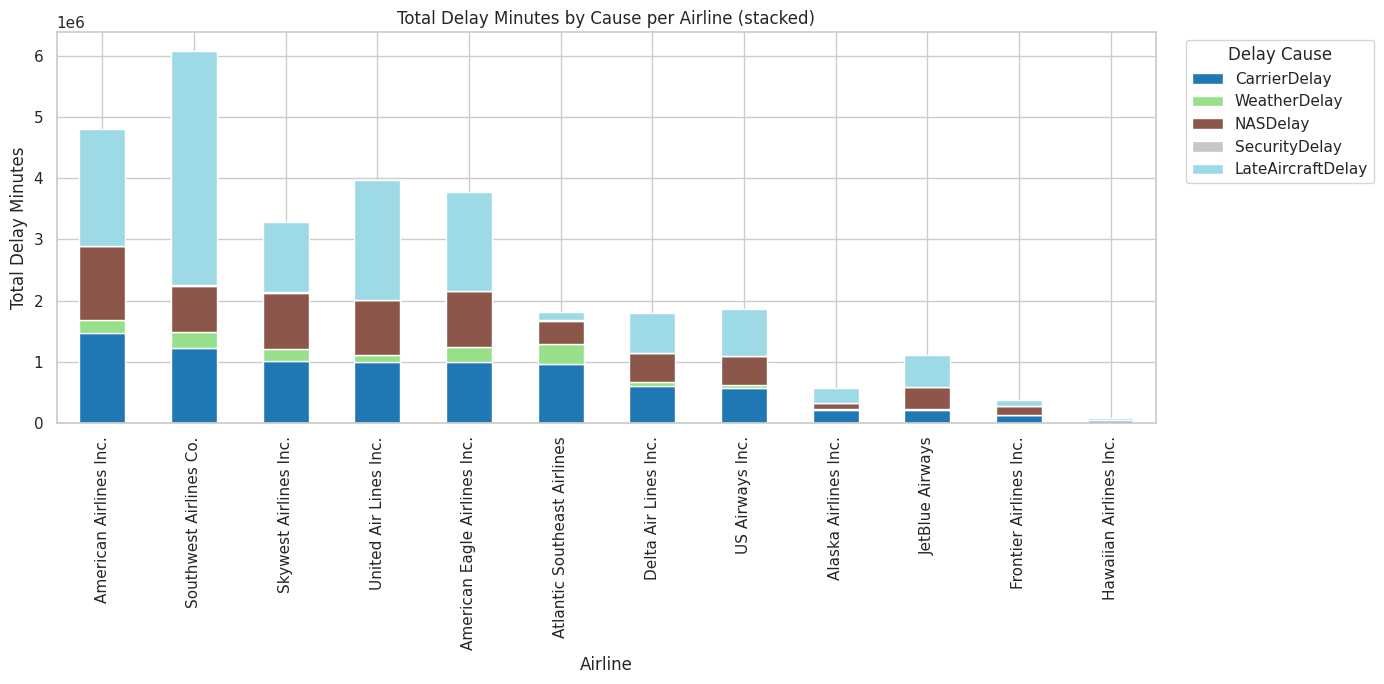

In [0]:
# aggregate total minutes by airline and cause
total_by_airline = df.groupby('Airline')[delay_causes].sum().sort_values(by=delay_causes[0], ascending=False)

# plot (large airlines first)
ax = total_by_airline.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title("Total Delay Minutes by Cause per Airline (stacked)")
plt.xlabel("Airline")
plt.ylabel("Total Delay Minutes")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


#2) Normalized Stacked Bar: Proportion of Delay Causes per Airline

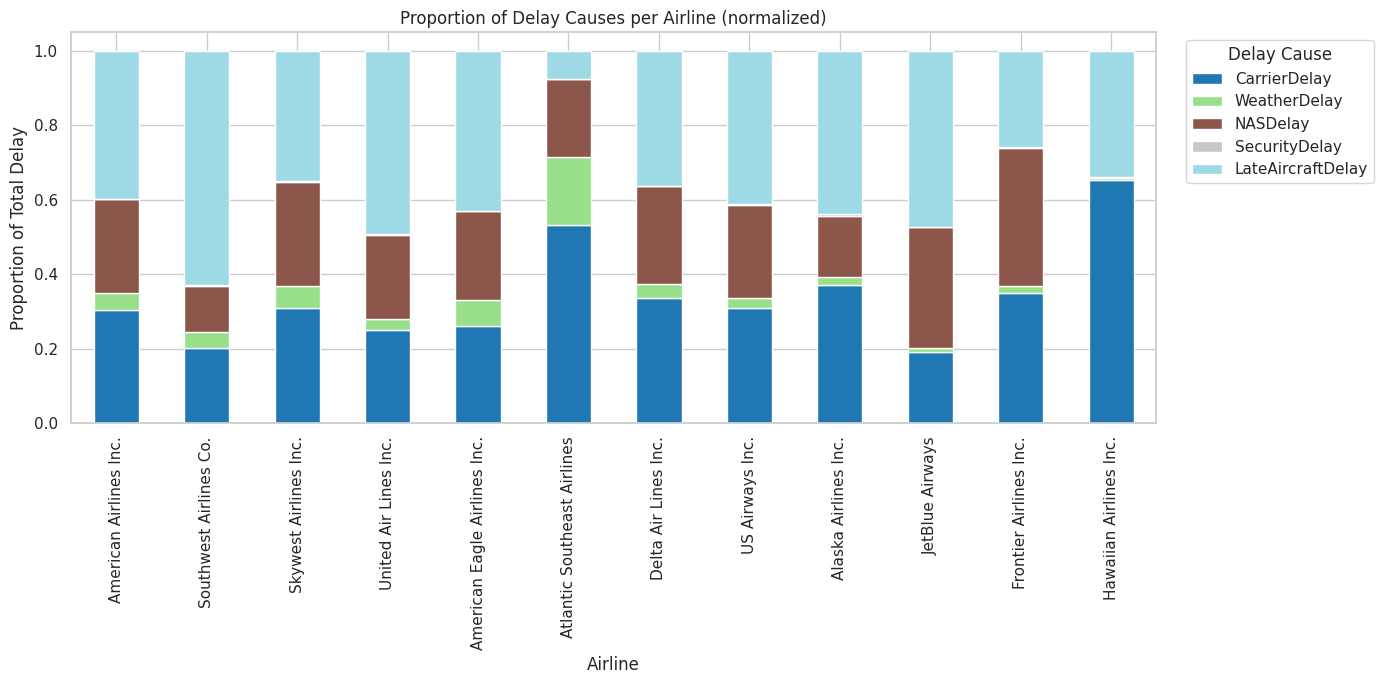

In [0]:
# normalize rows to proportions
prop_by_airline = total_by_airline.div(total_by_airline.sum(axis=1), axis=0).fillna(0)

ax = prop_by_airline.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title("Proportion of Delay Causes per Airline (normalized)")
plt.xlabel("Airline")
plt.ylabel("Proportion of Total Delay")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


#3) Mean Delay of Each Delay Type (bar)

/home/spark-4740a8a8-c74f-4f0a-b9cd-8e/.ipykernel/2434/command-8468792693031369-3426704380:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_delays.values, y=mean_delays.index, palette="magma")


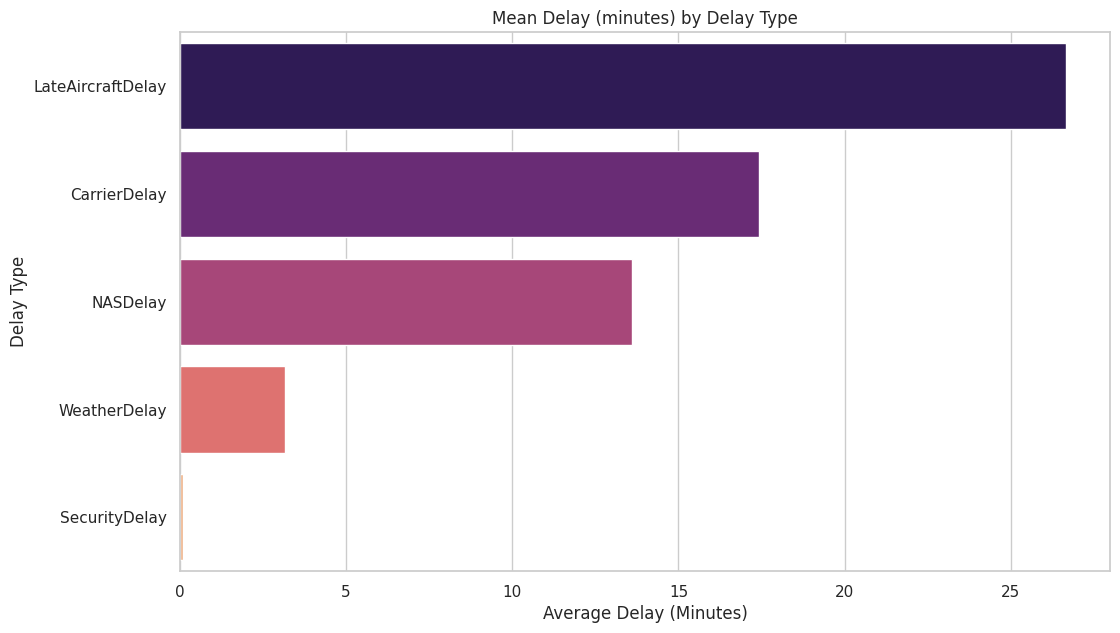

In [0]:
mean_delays = df[delay_causes].mean().sort_values(ascending=False)
sns.barplot(x=mean_delays.values, y=mean_delays.index, palette="magma")
plt.title("Mean Delay (minutes) by Delay Type")
plt.xlabel("Average Delay (Minutes)")
plt.ylabel("Delay Type")
plt.show()


#4) Boxplots: Outliers & Spread by Delay Type

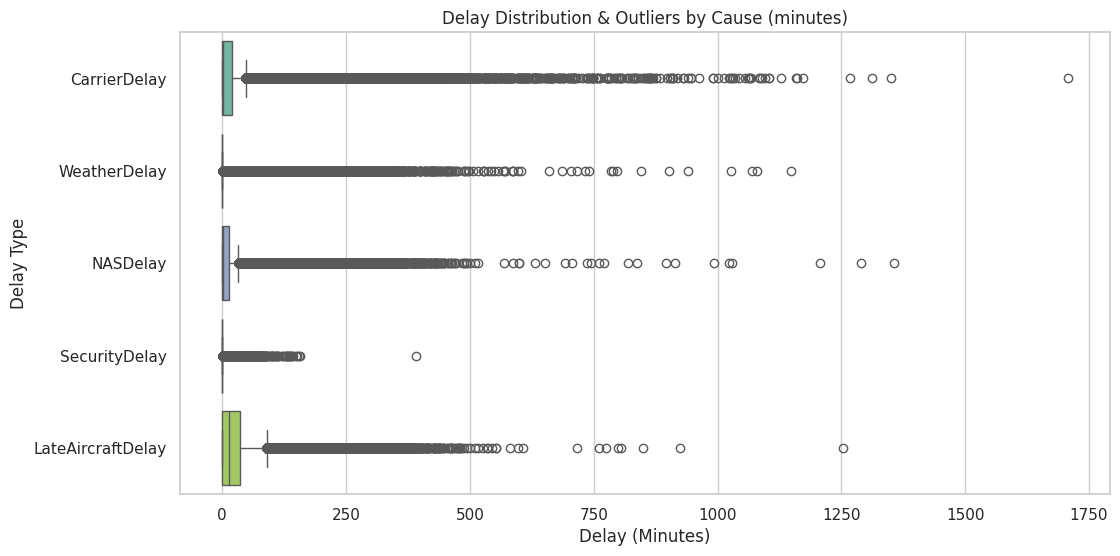

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[delay_causes], orient='h', palette='Set2', showfliers=True)
plt.title("Delay Distribution & Outliers by Cause (minutes)")
plt.xlabel("Delay (Minutes)")
plt.ylabel("Delay Type")
plt.show()


#5) Departure Delay Distribution & Arrival Delay Distribution (hist + KDE)

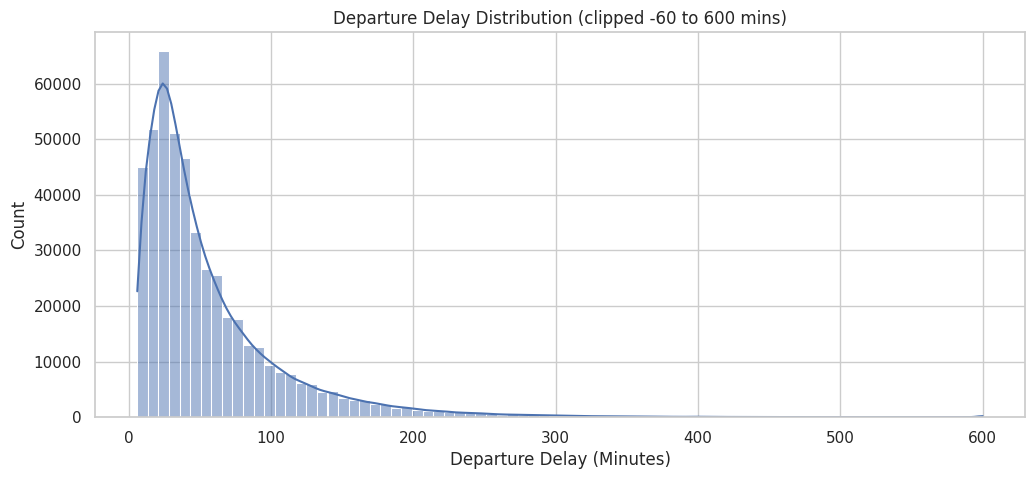

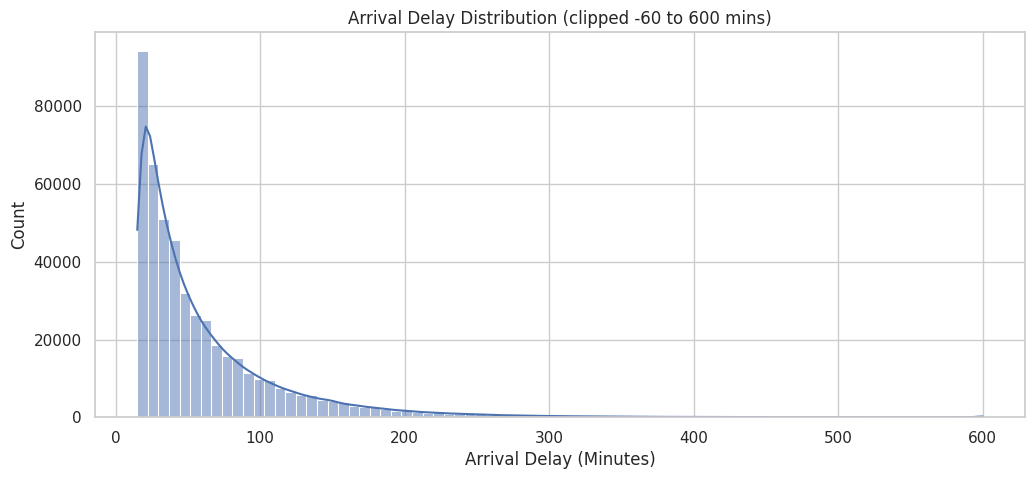

In [0]:
# Departure
plt.figure(figsize=(12,5))
sns.histplot(df['DepDelay'].clip(lower=-60, upper=600), bins=80, kde=True)  # clip to reduce extreme tail effect
plt.title("Departure Delay Distribution (clipped -60 to 600 mins)")
plt.xlabel("Departure Delay (Minutes)")
plt.show()

# Arrival
plt.figure(figsize=(12,5))
sns.histplot(df['ArrDelay'].clip(lower=-60, upper=600), bins=80, kde=True)
plt.title("Arrival Delay Distribution (clipped -60 to 600 mins)")
plt.xlabel("Arrival Delay (Minutes)")
plt.show()


#6) Monthly Trend Comparison: Carrier vs Weather vs NAS (line)

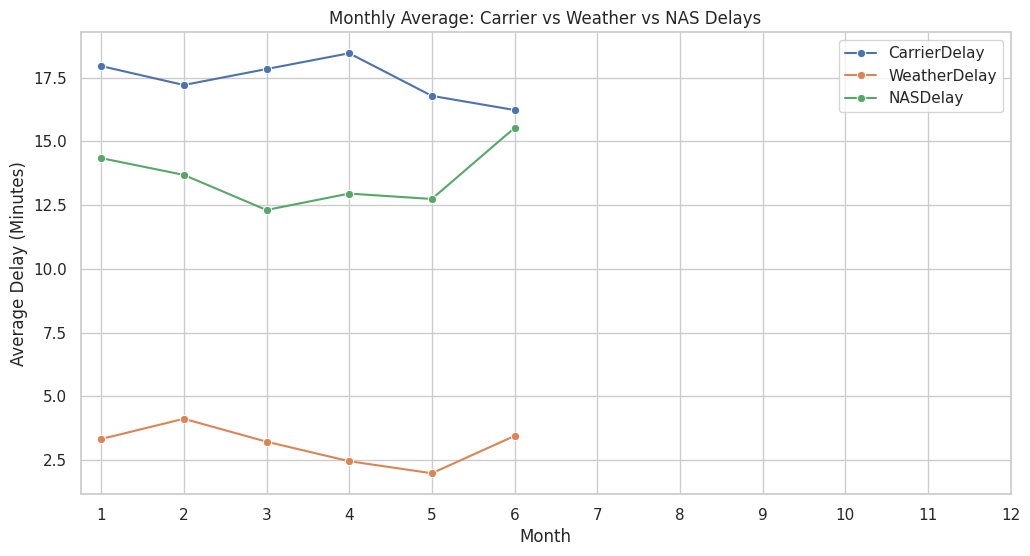

In [0]:
monthly_causes = df.groupby('Month')[['CarrierDelay','WeatherDelay','NASDelay']].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_causes, x='Month', y='CarrierDelay', marker='o', label='CarrierDelay')
sns.lineplot(data=monthly_causes, x='Month', y='WeatherDelay', marker='o', label='WeatherDelay')
sns.lineplot(data=monthly_causes, x='Month', y='NASDelay', marker='o', label='NASDelay')
plt.title("Monthly Average: Carrier vs Weather vs NAS Delays")
plt.xlabel("Month")
plt.ylabel("Average Delay (Minutes)")
plt.xticks(range(1,13))
plt.legend()
plt.show()


#8) Average Arrival Delay by Hour for Top 5 Airports (line) — (new: per-airport cause overlay optional)

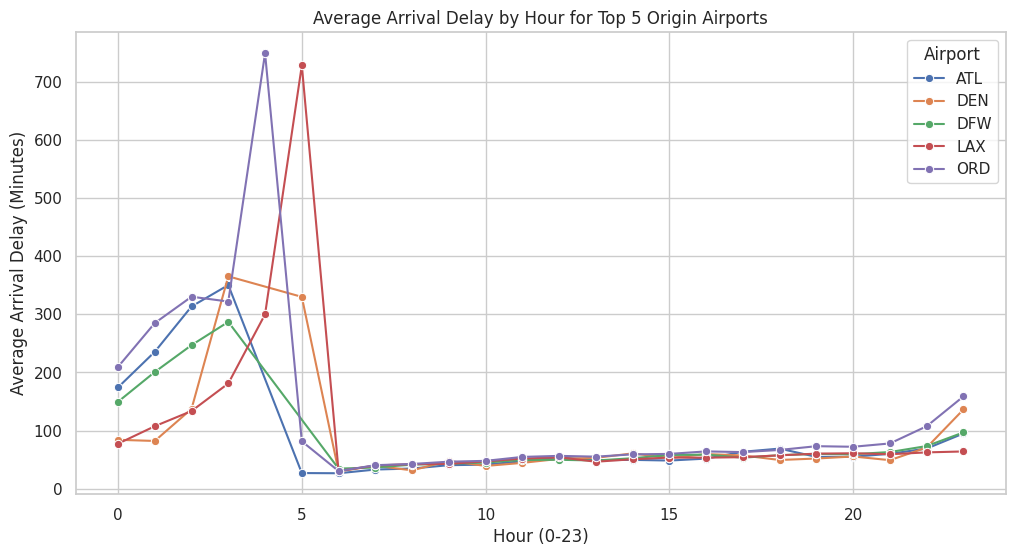

In [0]:
top5_airports = df['Origin'].value_counts().head(5).index
subset = df[df['Origin'].isin(top5_airports)]
avg_arr_hour_airport = subset.groupby(['Origin','DepHour'])['ArrDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_arr_hour_airport, x='DepHour', y='ArrDelay', hue='Origin', marker='o')
plt.title("Average Arrival Delay by Hour for Top 5 Origin Airports")
plt.xlabel("Hour (0-23)")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.legend(title='Airport')
plt.show()


9) Average Departure Delay by Hour for Top 5 Airlines (line)

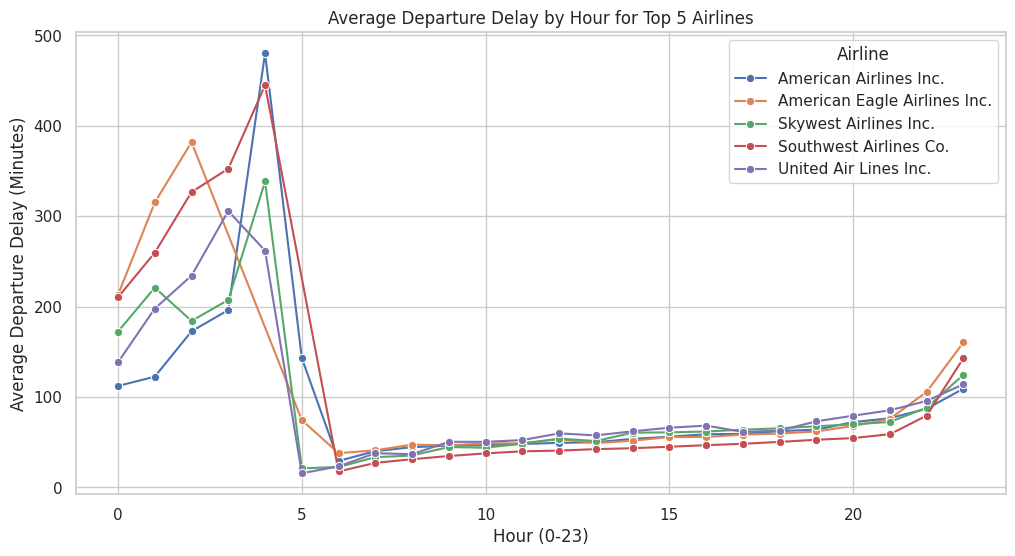

In [0]:
top5_airlines = df['Airline'].value_counts().head(5).index
subset = df[df['Airline'].isin(top5_airlines)]
avg_dep_hour_airline = subset.groupby(['Airline','DepHour'])['DepDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_dep_hour_airline, x='DepHour', y='DepDelay', hue='Airline', marker='o')
plt.title("Average Departure Delay by Hour for Top 5 Airlines")
plt.xlabel("Hour (0-23)")
plt.ylabel("Average Departure Delay (Minutes)")
plt.legend(title='Airline')
plt.show()


#10) Airport-level Cause Share (Top 10 Origin Airports) — stacked bar (percentage)

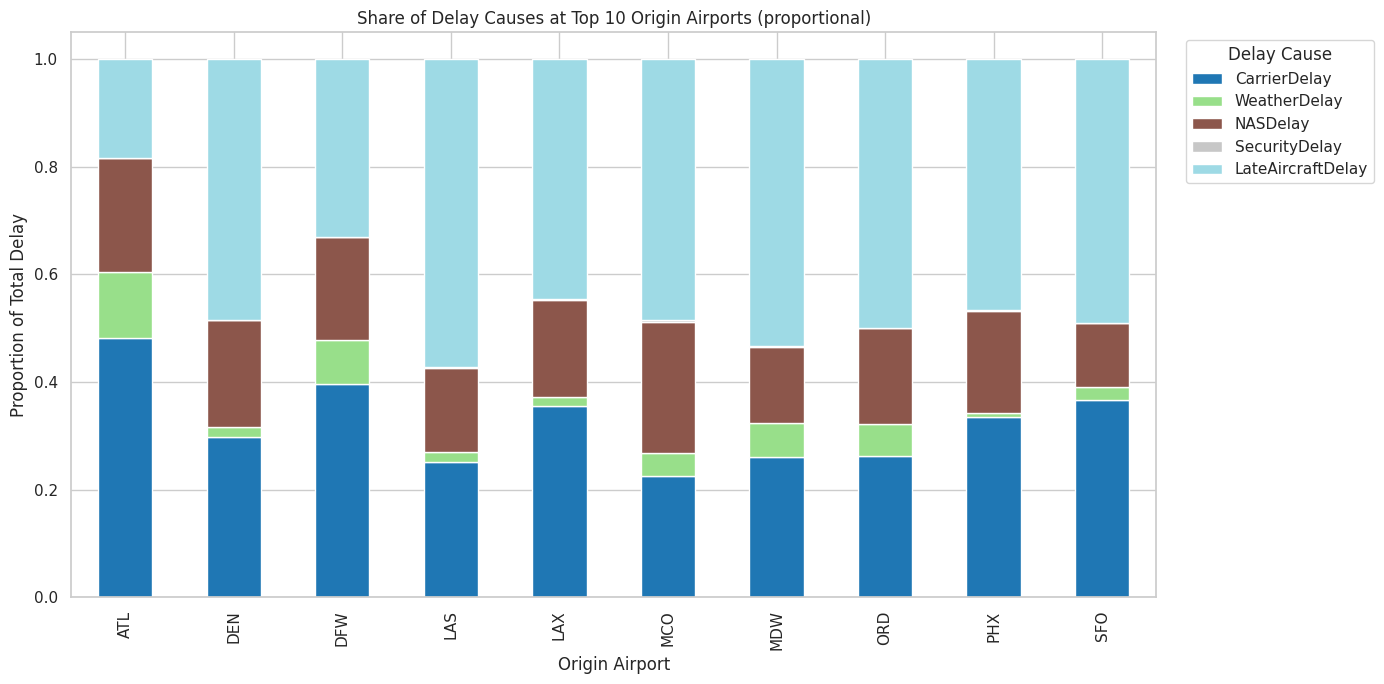

In [0]:
top10_airports = df['Origin'].value_counts().head(10).index
airport_causes = df[df['Origin'].isin(top10_airports)].groupby('Origin')[delay_causes].sum()
airport_prop = airport_causes.div(airport_causes.sum(axis=1), axis=0)

ax = airport_prop.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title("Share of Delay Causes at Top 10 Origin Airports (proportional)")
plt.xlabel("Origin Airport")
plt.ylabel("Proportion of Total Delay")
plt.legend(title='Delay Cause', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()
